<a href="https://colab.research.google.com/github/Mv0sKff/MyDeepLearning/blob/main/week_8/Assignment_AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Week 8
Data Augmentation and AE Networks usinng MNIST

In [1]:
#MNIST is a build in Pytorch dataset
from torchvision import datasets as dts
from torchvision.transforms import ToTensor
train = dts.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test = dts.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.93MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.38MB/s]


In [2]:
train[0][0].shape

torch.Size([1, 28, 28])

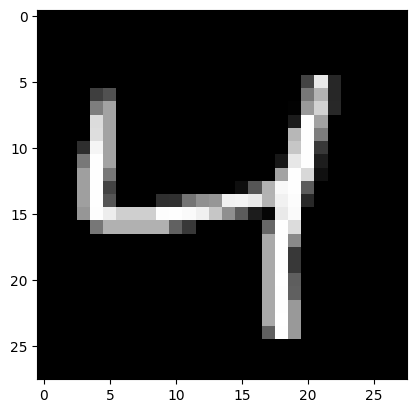

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train[2][0].reshape((28,28)), cmap='gray')

## Exercise 1
Augment the training data with 6 differnet suitable augmentations
* use the PyTorch augmentation framework -> https://pytorch.org/vision/stable/transforms.html
* visualize some examples

In [4]:
import torch
#from torchvision.transforms import v2
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.RandomGrayscale(p=0.1),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    #transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    #transforms.ToTensor()
])

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
aug_train = []

#for i in range(len(train)):
for i in range(50):
    img, label = train[i]
    img = img.to(device)
    aug_img = transform(img)
    aug_img = aug_img.permute(1, 2, 0).squeeze()
    aug_img = aug_img.cpu()

    aug_train.append((aug_img, label))

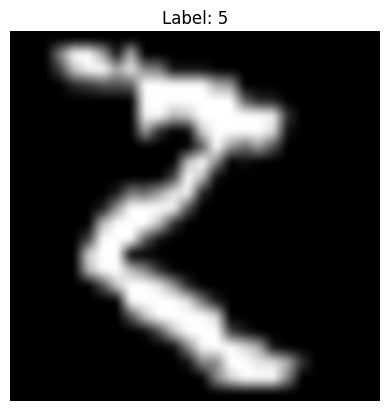

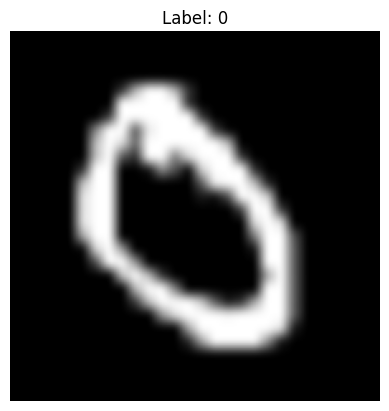

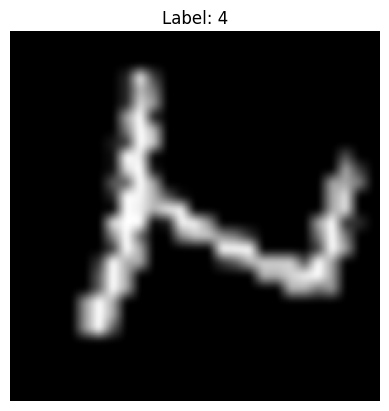

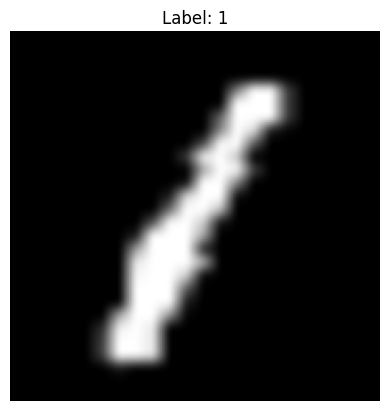

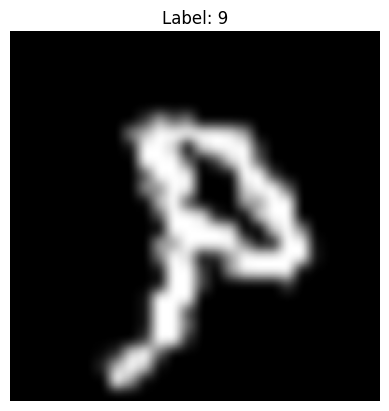

In [7]:
for i in range(5):
    img, label = train[i]
    aug_img, _ = aug_train[i]
    plt.imshow(aug_img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

## Exercise 2
Build and train a MLP Autoencoder with
* 2 Encoder Layers
* 2 Decoder Layers
* Identity Loss

## Exercise 3


Use the Gaussian Noise as augmentation and your AE to remove the noise.
* visualize input and output examples

In [8]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

## Exercise 4
Clustering: extract the latent space representations of the train data and apply K-Means (fron Scikit-Learn) with k=10. Use the data lables to evaluate the cluter quality.